# Regresión lineal

En este notebook de vamos a ver cómo modelar datos mediante regresion lineal (multivariada), interpretando los resultados y discutiendo las limitaciones.

Vamos a introducir a la libreria de Python scikit-learn (https://scikit-learn.org/)


Scikit-learn no solamente es útil, sino que su documentación es excelente. Les recomendamos entrar a la página web y explorarla. Creemos que es posible aprender un montón de machine learning únicamente mirando la documentación de scikit-learn.

Vamos a inventarnos un dataset para trabajar en este notebook. El dataset va a constar de una variable dependiente (cantidad de unidades vendidas) y las siguientes dos variables independientes: precio por unidad y gasto publicitario.

El dataset va a ser "sintético", creado por nosotros mismos. Primero inventamos valores para el precio por unidad y la inversión publicitaria:

In [1]:
import numpy as np

precio = np.array([24, 30, 43 , 101, 34, 94, 10, 15, 12, 44, 202, 156, 90])
gasto = np.array([2000, 4801, 210, 10000, 6000, 503, 491, 4000, 9200, 1000, 1500, 1800, 3000])

precio.shape

(13,)

Ahora, vamos a construir la variable dependiente, "ventas".

Primero, vamos a considerar un coeficiente negativo por "precio" sumado a un término de error:


In [2]:
X = precio.reshape(-1, 1) # esto es necesario para transformar el vector en matriz

print(X.shape)

beta, beta0 = -0.3, 100

mu, sigma = 0, 10   # medio y desvío estándar del error
epsilon = np.random.normal(mu, sigma, X.shape[0])

y = (np.dot(np.transpose(X),beta)+ beta0 + epsilon).round()
y = np.transpose(y)

print(X)
print(y)


(13, 1)
[[ 24]
 [ 30]
 [ 43]
 [101]
 [ 34]
 [ 94]
 [ 10]
 [ 15]
 [ 12]
 [ 44]
 [202]
 [156]
 [ 90]]
[[ 90.]
 [ 84.]
 [ 87.]
 [ 83.]
 [ 71.]
 [ 54.]
 [ 99.]
 [113.]
 [ 93.]
 [ 93.]
 [ 44.]
 [ 56.]
 [ 79.]]


Podemos hacer el plot de una variable contra la otra y ver que sugiere que existe una relación lineal entre ambas:

Text(0.5, 0, 'Precio por unidad')

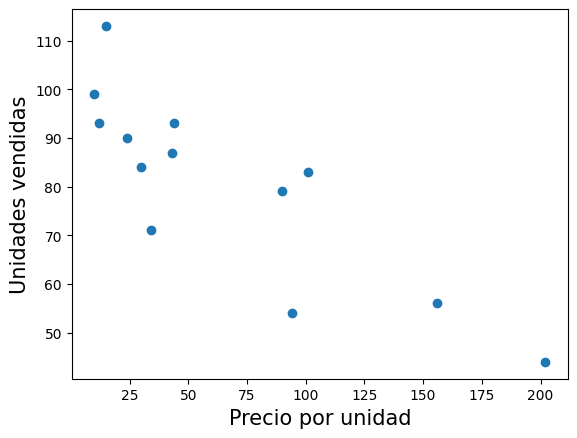

In [3]:
import matplotlib.pyplot as plt

plt.scatter(X,y)
plt.ylabel(r'Unidades vendidas', fontsize=15, color='black')
plt.xlabel(r'Precio por unidad', fontsize=15, color='black')

Vimos que el objetivo de la regresión lineal es encontrar parámetros beta0, beta1 tales que minimicen el error cuadrático medio. Esto lo vamos a hacer más adelante con scikit-learn.

Antes, podemos ilustrar el problema a resolver de la siguiente manera. Definamos una función que encuentra el error cuadrático medio dados parámetros beta0, beta1.

In [4]:
def error_cuadratico_medio(X,y,beta):
  error=0.0
  for n,val in enumerate(y):
    y_est = beta[0] + beta[1]*X[n]
    error = error + (y_est - y[n])**2
  return error/len(y)


Ahora puedo adivinar valores de beta y obtener el error asociado.

In [5]:
print(error_cuadratico_medio(X,y,[60,0.4]))
print(error_cuadratico_medio(X,y,[60,-0.4]))
print(error_cuadratico_medio(X,y,[-60,0.4]))
print(error_cuadratico_medio(X,y,[100,-0.3])) # este es el valor real de los parametros

[1646.25230769]
[2338.06769231]
[14643.17538462]
[102.25153846]


Visualicemos la curva tridimensional que tengo que minimizar para encontrar los parametros: la curva del error cuadratico medio vs. beta0 y beta1.

Text(0.5, 0.5, 'beta1')

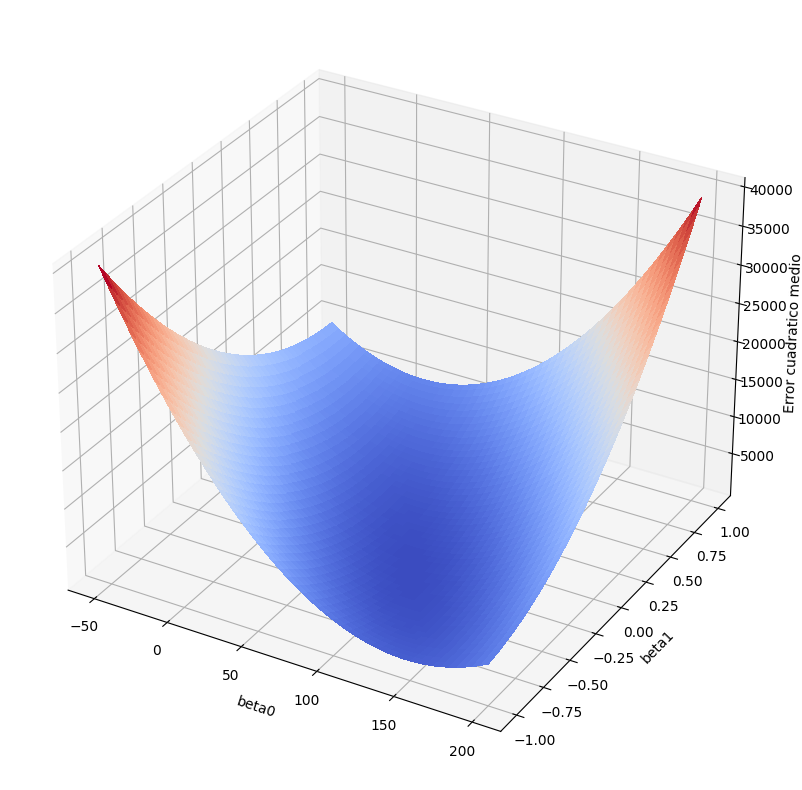

In [6]:
beta0 = np.arange(-50,200,0.25)
beta = np.arange(-1,1,0.01)
X0, Y0 = np.meshgrid(beta0, beta)

Z = error_cuadratico_medio(X,y,[X0,Y0])

from matplotlib import cm

fig, ax = plt.subplots(subplot_kw={"projection": "3d"}, figsize=(10, 10))
surf = ax.plot_surface(X0, Y0, Z, cmap=cm.coolwarm, linewidth=0, antialiased=False)
ax.set_zlabel('Error cuadratico medio')
ax.set_xlabel('beta0')
ax.set_ylabel('beta1')


Ahora ajustamos un modelo de regresión lineal a los datos usando sci-kit learn.

El proceso de ajustar modelos con scikit-learn es siempre el mismo:

1.   Creamos un objeto que representa el modelo, pasándole los parámetros correspondientes.
2.   Entrenamos el modelo con los datos.
3.   Usamos el modelo para predecir el valor de nuevos datos.



In [7]:
from sklearn.linear_model import LinearRegression

reg = LinearRegression()
reg.fit(X,y)

estimated = [reg.intercept_, reg.coef_]  # los parametros estimados
print(estimated)

R2 = reg.score(X,y) # R2
print(R2)


[array([98.65191706]), array([[-0.27657886]])]
0.7155863637088323


Vamos a graficar la recta teórica junto con la que mejor ajusta los datos.

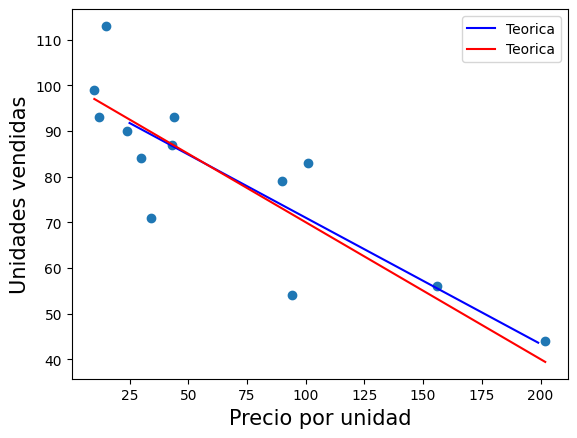

In [8]:
plt.scatter(X,y)
plt.ylabel(r'Unidades vendidas', fontsize=15, color='black')
plt.xlabel(r'Precio por unidad', fontsize=15, color='black')

x_var = np.arange( X.min(), X.max(), 0.001)
y_var = estimated[0] + x_var*estimated[1]
y_var_est = 100 + x_var*(-0.3)

#plt.plot(x_var,np.transpose(y_var),label="Estimado", color='b')
x = np.arange(25,200,1)
ypred = reg.predict(x.reshape(-1, 1))
plt.plot(x,ypred,label="Teorica", color='b')
plt.plot(x_var,np.transpose(y_var_est),label="Teorica", color='r')

plt.legend(loc='upper right')

Supongamos que agregamos más datos y conocemos el precio por unidad. ¿Cuál es la predicción sobre la cantidad de unidades vendidas?

Text(0.5, 0, 'Precio por unidad')

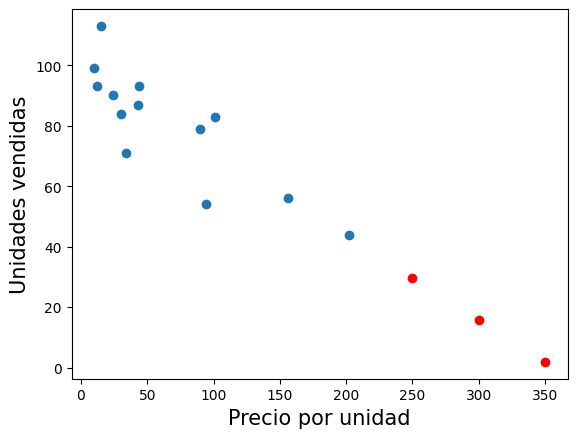

In [9]:
precios_nuevo = np.array([250, 300, 350])
X_nuevo = precios_nuevo.reshape(-1, 1)

y_nuevo = reg.predict(X_nuevo)  # hago la prediccion para estos nuevos valores

plt.scatter(X,y)
plt.scatter(X_nuevo,y_nuevo, color='r')

plt.ylabel(r'Unidades vendidas', fontsize=15, color='black')
plt.xlabel(r'Precio por unidad', fontsize=15, color='black')


Veamos por último el caso de la regresión usando dos variables independientes: el precio por unidad y el gasto de publicidad.

Primero creo una matriz que contenga ambas variables y luego simulo los datos multiplicando cada fila por su coeficiente, y agregando ruido normalmente distribuido.

In [10]:
X = np.column_stack((precio,gasto))  # variables independientes
beta = np.array([-0.3,0.1]) # parametros
beta0 = 20  #

mu, sigma = 0, 10   # medio y desvío estándar del error
epsilon = np.random.normal(mu, sigma, X.shape[0])

y = (np.dot(X,beta)+ beta0 + epsilon).round()

Ahora que ya simulé los datos, voy crear y estimar el modelo de regresión.

In [11]:
reg = LinearRegression()
reg.fit(X,y)

estimated = [reg.intercept_, reg.coef_[0], reg.coef_[1]]

print(estimated)

R2 = reg.score(X,y) # R2
print(R2)


[19.317004442315294, -0.3619406837685018, 0.10067044662109807]
0.9991152498049122


## TP California Housing Prices Regression

En este conjunto de datos,
tenemos información sobre la demografía (ingreso, población, ocupación de la vivienda) en los distritos, la ubicación de los distritos (latitud, longitud) e información general sobre la vivienda en los distritos (número de cuartos, número de dormitorios, antigüedad de los casa).


Entrene un modelo de regresión para estimar los precios de las viviendas en función de las caracteristicas presentadas

In [12]:
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
import sklearn.linear_model as linear_model
from sklearn import metrics

https://scikit-learn.org/stable/datasets/real_world.html#california-housing-dataset

In [13]:
#https://scikit-learn.org/stable/modules/generated/sklearn.datasets.fetch_california_housing.html#sklearn.datasets.fetch_california_housing


In [14]:
# obtener conjunto de datos

In [15]:
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split

In [16]:
housing = fetch_california_housing(as_frame=True)

In [17]:
print(housing.DESCR)

.. _california_housing_dataset:

California Housing dataset
--------------------------

**Data Set Characteristics:**

    :Number of Instances: 20640

    :Number of Attributes: 8 numeric, predictive attributes and the target

    :Attribute Information:
        - MedInc        median income in block group
        - HouseAge      median house age in block group
        - AveRooms      average number of rooms per household
        - AveBedrms     average number of bedrooms per household
        - Population    block group population
        - AveOccup      average number of household members
        - Latitude      block group latitude
        - Longitude     block group longitude

    :Missing Attribute Values: None

This dataset was obtained from the StatLib repository.
https://www.dcc.fc.up.pt/~ltorgo/Regression/cal_housing.html

The target variable is the median house value for California districts,
expressed in hundreds of thousands of dollars ($100,000).

This dataset was derived

In [18]:
# Ver el dataframe entero
housing.frame.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [19]:
# Ver los datos de las características
X = housing.data
X.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25


In [20]:
# ver los datos de la variable target y llamarlo Y
y = housing.target
y.head()

0    4.526
1    3.585
2    3.521
3    3.413
4    3.422
Name: MedHouseVal, dtype: float64

In [21]:
# Separa el dataset en training y validation
X_train,X_test,Y_train,Y_test = train_test_split(X,y,test_size=0.2)

In [22]:
print(X_train.shape)
print(Y_train.shape)
print(X_test.shape)
print(Y_test.shape)

(16512, 8)
(16512,)
(4128, 8)
(4128,)


In [23]:
# Create model
linear_regression = linear_model.LinearRegression()

In [24]:
# Fit model to our dataset
linear_regression.fit(X_train, Y_train)

LinearRegression()

In [25]:
# The coefficient values of our model
print(linear_regression.coef_)

[ 4.35087817e-01  9.84915545e-03 -1.01362818e-01  6.11029505e-01
 -4.59761551e-06 -3.41578311e-03 -4.22350898e-01 -4.36826933e-01]


<h4> Model Analysis </h4>

In [26]:
# Find predicted values on our test dataset
predicted_values = linear_regression.predict(X_test)

In [27]:
from sklearn import metrics
print('Mean Absolute Error:', metrics.mean_absolute_error(Y_test, predicted_values))
print('Mean Squared Error:', metrics.mean_squared_error(Y_test, predicted_values))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(Y_test, predicted_values)))

Mean Absolute Error: 0.5280714827371106
Mean Squared Error: 0.510175119442221
Root Mean Squared Error: 0.7142654404646924


In [28]:
# Find our linear regression score (R2 value)
print('R2 Value for Test Data:', linear_regression.score(X_test, Y_test))
print('R2 Value for Training Data:', linear_regression.score(X_train, Y_train))

R2 Value for Test Data: 0.6210657525841923
R2 Value for Training Data: 0.6023551176491575
